# Setup
## import calour

In [1]:
import calour as ca

## let's set to print messages of INFO level from Calour
Calour uses Python's builtin [`logging` module](https://docs.python.org/3.5/library/logging.html#levels) to print out logging messages. By default the logging level is set to `WARNING`. Let's change it to `INFO` for the purpose of this tutorial, so we get more detailed information about the function outputs.

In [2]:
ca.set_log_level('INFO')

## and we want interactive plots inside the notebook

In [3]:
%matplotlib notebook

# Moving picture data set

This data set is from:
Caporaso JG, Lauber CL, Costello EK, Berg-Lyons D, Gonzalez A, Stombaugh J, Knights D, Gajer P, Ravel J, Fierer N, et al. (2011) Moving pictures of the human microbiome. Genome Biology, 12, R50.

The raw data are reproccessed with [deblur method](https://github.com/biocore/deblur), which is published in [mSystem](http://msystems.asm.org/content/2/2/e00191-16)

## Load the data

We use __`read_amplicon`__ to read the data into __`AmpliconExperiment`__ class. This class has some amplicon experiment specific functions such as `filter_taxonomy` etc.

Useful parameters are:
- biom table name
- mapping file name (can be None if no sample metadata available)
- filter_reads - the minimal number of reads per sample in order to keep it
- normalize - the depth to normalize each sample to (note it is not rarefaction butn normalization to constant sum)

In [4]:
exp = ca.read_amplicon(data_file='./moving_pic.biom', sample_metadata_file='./moving_pic.sample.txt', filter_reads=1000, normalize=10000)

2017-05-03 15:38:18 INFO loaded 1968 samples, 7056 observations
2017-05-03 15:38:18 INFO 1967 remaining


In [5]:
exp

AmpliconExperiment moving_pic.biom with 1967 samples, 7056 features

## each `Experiment` has the following attributes:
### `data` : a data sparse (or dense) 2D array

This stores the abundance information. Each row is a sample, each column a feature (i.e. OTU, gene, metabolites, etc)

In [6]:
exp.data

<1967x7056 sparse matrix of type '<class 'numpy.float64'>'
	with 130081 stored elements in Compressed Sparse Row format>

### `sample_metadata` : a pandas dataframe with one row per sample
index is the SampleID (first column in the mapping file), matching the biom table sampleIDs

In [7]:
exp.sample_metadata.head(5)

,#SampleID,BarcodeSequence,LinkerPrimerSequence,DAYS_SINCE_EPOCH,TARGET_SUBFRAGMENT,ASSIGNED_FROM_GEO,EXPERIMENT_CENTER,TITLE,COMMON_SAMPLE_SITE,RUN_PREFIX,...,KEY_SEQ,BODY_PRODUCT,AGE_IN_YEARS,RUN_CENTER,LIBRARY_CONSTRUCTION_PROTOCOL,LATITUDE,REGION,HOST_INDIVIDUAL,Description,_calour_original_abundance
#SampleID,,,,,,,,,,,,,,,,,,,,,
L2S137.273277,L2S137.273277,AATCAGTCTCGT,GTGCCAGCMGCCGCGGTAA,14223,V4,n,CCME,Moving_pictures_of_the_human_microbiome,L_palm,s_2_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L2,F4,illumina_time_series,10000.0
L3S167.273782,L3S167.273782,TACTTCGCTCGC,GTGCCAGCMGCCGCGGTAA,14526,V4,n,CCME,Moving_pictures_of_the_human_microbiome,L_palm,s_3_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L3,M3,illumina_time_series,10000.0
L4S102.275028,L4S102.275028,GCAATAGCTGCT,GTGCCAGCMGCCGCGGTAA,14310,V4,n,CCME,Moving_pictures_of_the_human_microbiome,R_palm,s_4_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L4,M3,illumina_time_series,10000.0
L6S243.274842,L6S243.274842,ACGAGTGCTATC,GTGCCAGCMGCCGCGGTAA,14507,V4,n,CCME,Moving_pictures_of_the_human_microbiome,Tongue,s_6_sequence,...,none,UBERON:tongue,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L6,M3,illumina_time_series,10000.0
L3S240.274358,L3S240.274358,AGTACGCTCGAG,GTGCCAGCMGCCGCGGTAA,14178,V4,n,CCME,Moving_pictures_of_the_human_microbiome,R_palm,s_3_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L3,F4,illumina_time_series,10000.0


### `feature_metadata` : a pandas dataframe with one row per feature (i.e. sOTU)
For deblurred data set, index is the actual sequence, matching the biom table

Additional properties are loaded from biom table observation metadata (i.e. taxonomy)

In [8]:
exp.feature_metadata.head(5)

,id,taxonomy
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCTTAGGCGGCAAATTAAGTTAGTGGTTAAATAGTTCGGCTCAACCGGATTTCGCCATTAAAACTGATATGCTAGAGATTAAACGAGGTAGGCGGAATAAGTTA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidal...
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGTGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCG,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCTCGTAGGCGGTTTGTTGCGTCGGGAGTGAAAACTCAGGGCTTAACCCTGAGCCTGCTTCCGATACGGGCAGACTAGAGGTATGCAGGGGAGAACGGAATTCCTG,TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCT...,Bacteria;Actinobacteria;Actinobacteria;Actinom...
TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGCAGGGCTAGAGTGCAGGAGGGGCAAGTGGAATTCCTA,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,Bacteria;Firmicutes;Clostridia;Clostridiales;L...
TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGCTGATTAAGTCAGCGGTGAAAGGTAGCAGCTTAACTGTTTTACATGCCGTTGATACTGGTTAGCTTGAGTTGACAGAAGGCAGATAGAATTCCT,TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria;Bacteroidetes;Cytophagia;Cytophagales...


## Sort the samples 
sort by the time field, COMMON_SAMPLE_SITE (to get separation between left/right hand), and subject id

In [6]:
exp.sample_metadata.COMMON_SAMPLE_SITE.value_counts()

Tongue    508
L_palm    499
R_palm    493
feces     467
Name: COMMON_SAMPLE_SITE, dtype: int64

In [9]:
exp=exp.sort_samples('DAYS_SINCE_EXPERIMENT_START').sort_samples('COMMON_SAMPLE_SITE').sort_samples('HOST_SUBJECT_ID')

In [8]:
exp.feature_metadata.head()

,id,taxonomy
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCTTAGGCGGCAAATTAAGTTAGTGGTTAAATAGTTCGGCTCAACCGGATTTCGCCATTAAAACTGATATGCTAGAGATTAAACGAGGTAGGCGGAATAAGTTA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidal...
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGTGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCG,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCTCGTAGGCGGTTTGTTGCGTCGGGAGTGAAAACTCAGGGCTTAACCCTGAGCCTGCTTCCGATACGGGCAGACTAGAGGTATGCAGGGGAGAACGGAATTCCTG,TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCT...,Bacteria;Actinobacteria;Actinobacteria;Actinom...
TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGCAGGGCTAGAGTGCAGGAGGGGCAAGTGGAATTCCTA,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,Bacteria;Firmicutes;Clostridia;Clostridiales;L...
TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGCTGATTAAGTCAGCGGTGAAAGGTAGCAGCTTAACTGTTTTACATGCCGTTGATACTGGTTAGCTTGAGTTGACAGAAGGCAGATAGAATTCCT,TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria;Bacteroidetes;Cytophagia;Cytophagales...


## divide to per sample-type experiments

In [10]:
exp.sample_metadata['BODY_PRODUCT'].value_counts()

UBERON:zone of skin of hand    992
UBERON:tongue                  508
UBERON:feces                   467
Name: BODY_PRODUCT, dtype: int64

let's split the dataset:

In [11]:
feces = exp.filter_samples('BODY_PRODUCT', 'UBERON:feces')
tongue = exp.filter_samples('BODY_PRODUCT', 'UBERON:tongue')
# just to have fun, let's negate and use multiple values
hand = exp.filter_samples('BODY_PRODUCT', ['UBERON:feces', 'UBERON:tongue'], negate=True )

__NOTE: The data array and sample and feature metadata are always synchronized to the same order__ for all the manipulations (filtering, sorting, transforming, etc.) done on `Experiment` object.

In [12]:
feces

AmpliconExperiment moving_pic.biom with 467 samples, 7056 features

In [13]:
tongue

AmpliconExperiment moving_pic.biom with 508 samples, 7056 features

In [14]:
hand

AmpliconExperiment moving_pic.biom with 992 samples, 7056 features

Note that filtering samples does not change or get rid of features not present in the set of samples.

## get rid of features with <50 reads total over all samples
(Where we have 10000 reads/sample after normalization in the load)

In [15]:
tt=exp.filter_min_abundance(50)

2017-05-03 15:21:48 INFO 2512 remaining


## And plot the data naively
We plot by sorting samples according to body site, with sample color bars for the subject id.

We use the `plot_sort` function which does a sort on a (set) of fields on the fly and then plots.
We can specify the type of interactive heatmap using the `gui` with following options:
- 'jupyter' plots an interactive plot inside the notebook
- 'qt5' opens the plot in an interactive qt5 window
- None just creates the static matplotlib figure

<IPython.core.display.Javascript object>


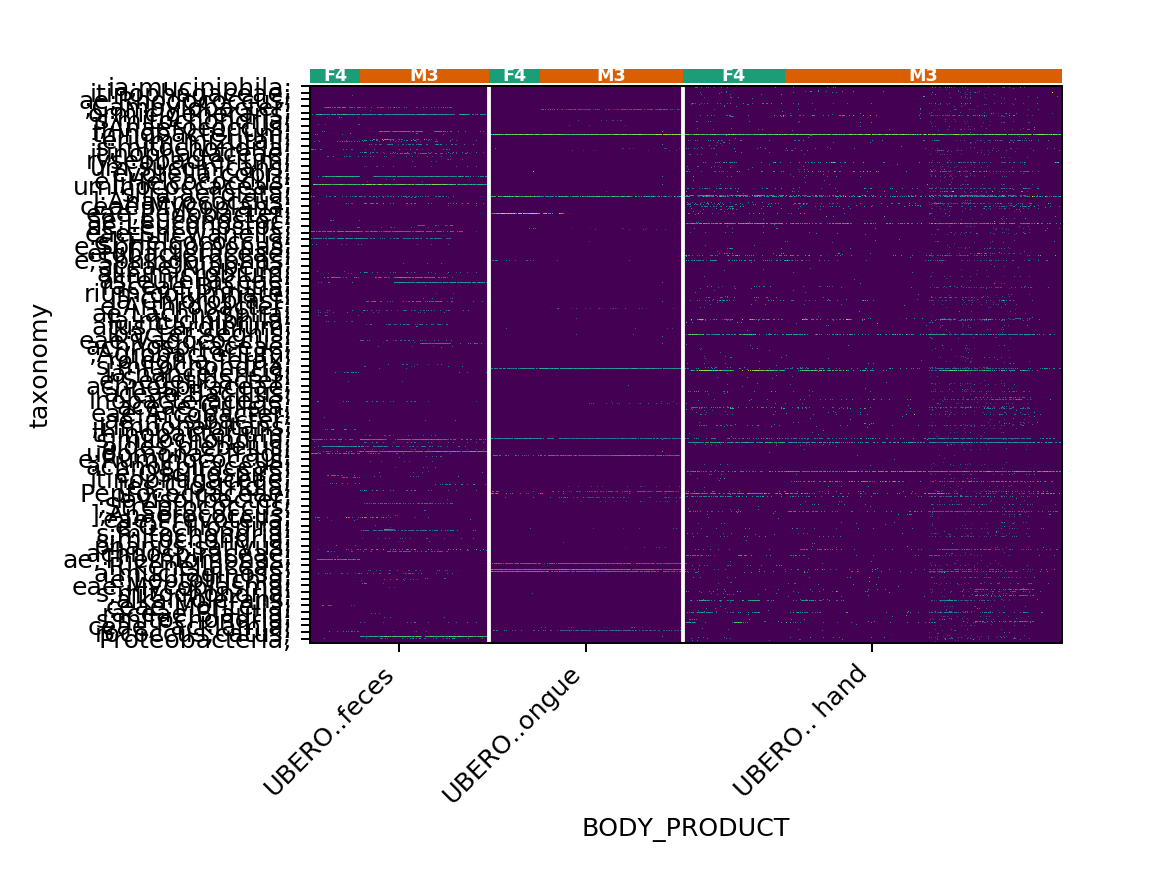

In [18]:
tt.plot_sort('BODY_PRODUCT',gui='jupyter',sample_color_bars=['HOST_SUBJECT_ID'])

## Sort bacteria by the taxonomy (just because we can :D)

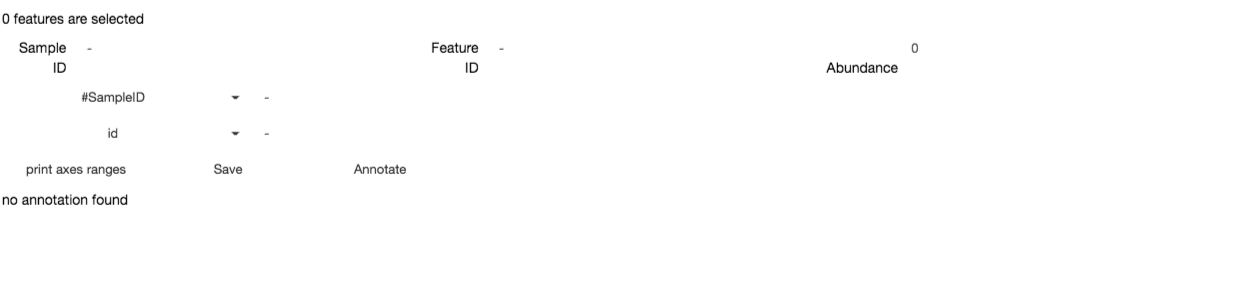

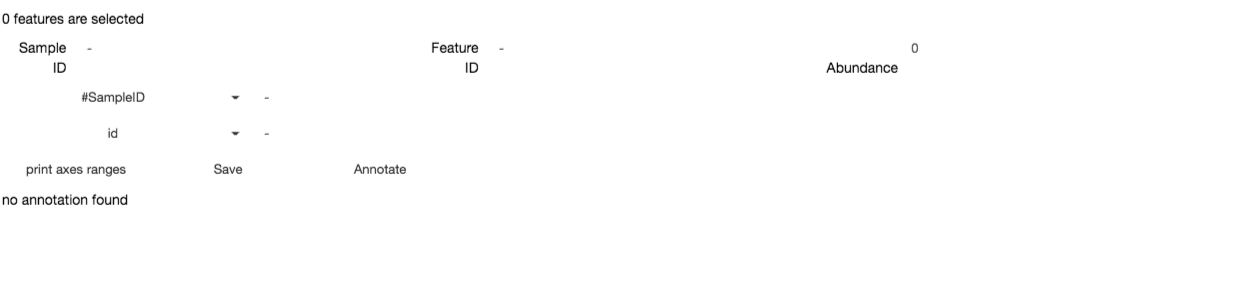

<IPython.core.display.Javascript object>


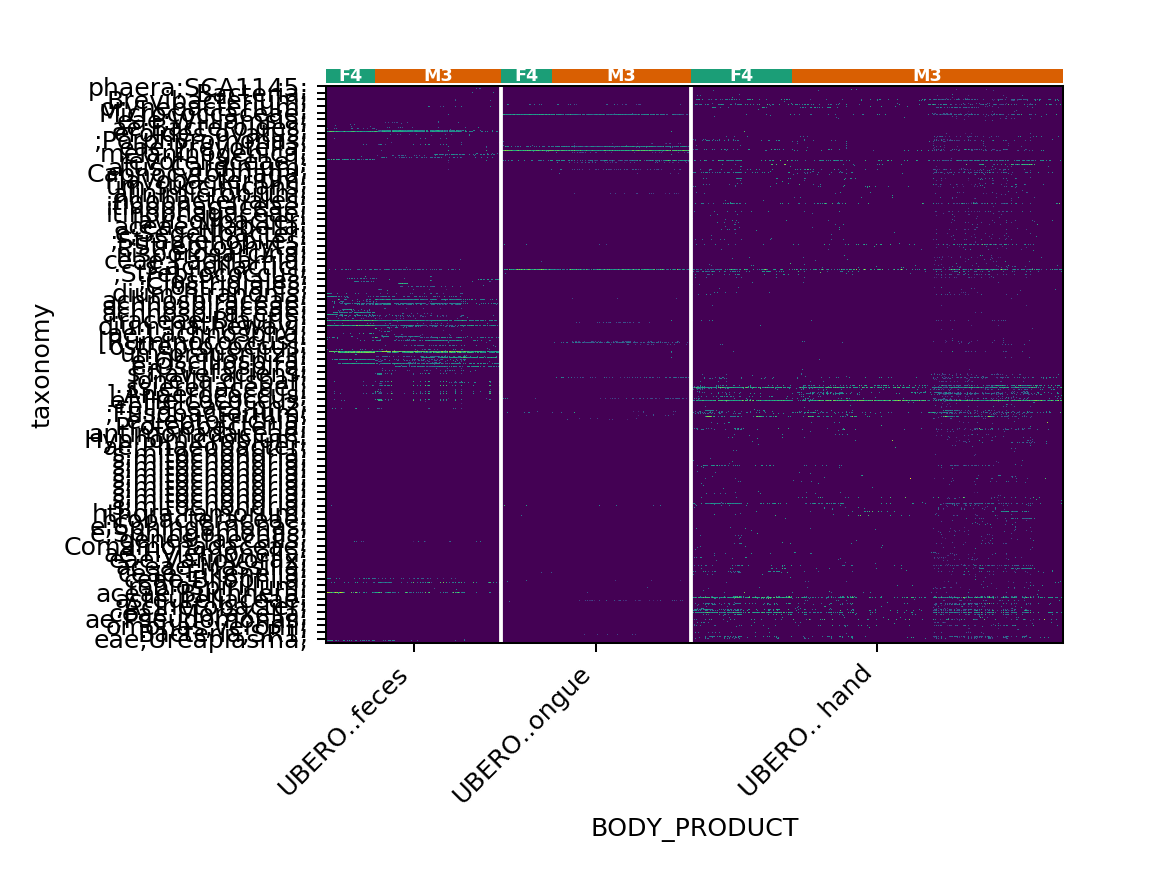

In [17]:
zz=tt.sort_taxonomy()
zz.plot_sort('BODY_PRODUCT',gui='jupyter',sample_color_bars=['HOST_SUBJECT_ID'])

## Sort bacteria by clustering
So similar behaving bacteria will be close to each other
We also remove bacteria with < 50 reads total, so the heatmap will be of the more interesting bacteria.

In [42]:
ttt=tt.cluster_features()

2017-05-02 13:42:30 INFO 2512 remaining


<IPython.core.display.Javascript object>


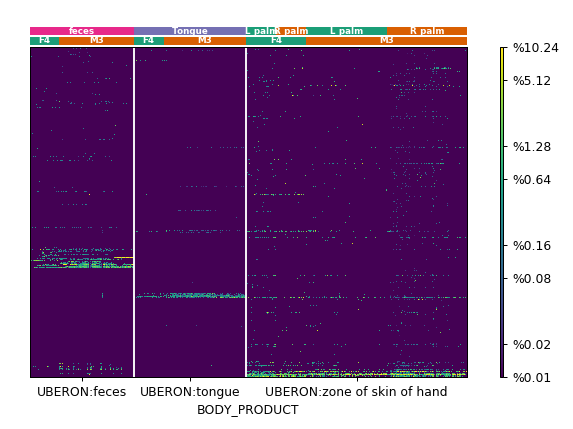

In [43]:
f=ttt.plot_sort('BODY_PRODUCT',gui='jupyter',sample_color_bars=['HOST_SUBJECT_ID','COMMON_SAMPLE_SITE'],
                feature_field=None, xticklabel_rot=None, xticklabel_len=None, show_legend_colorbar=True,
                clim=[0,10])

In [20]:
f.save_figure('figure-movpic-all-clustered.pdf')

This is the same plot but focused on a specific region that is interesting:

<IPython.core.display.Javascript object>


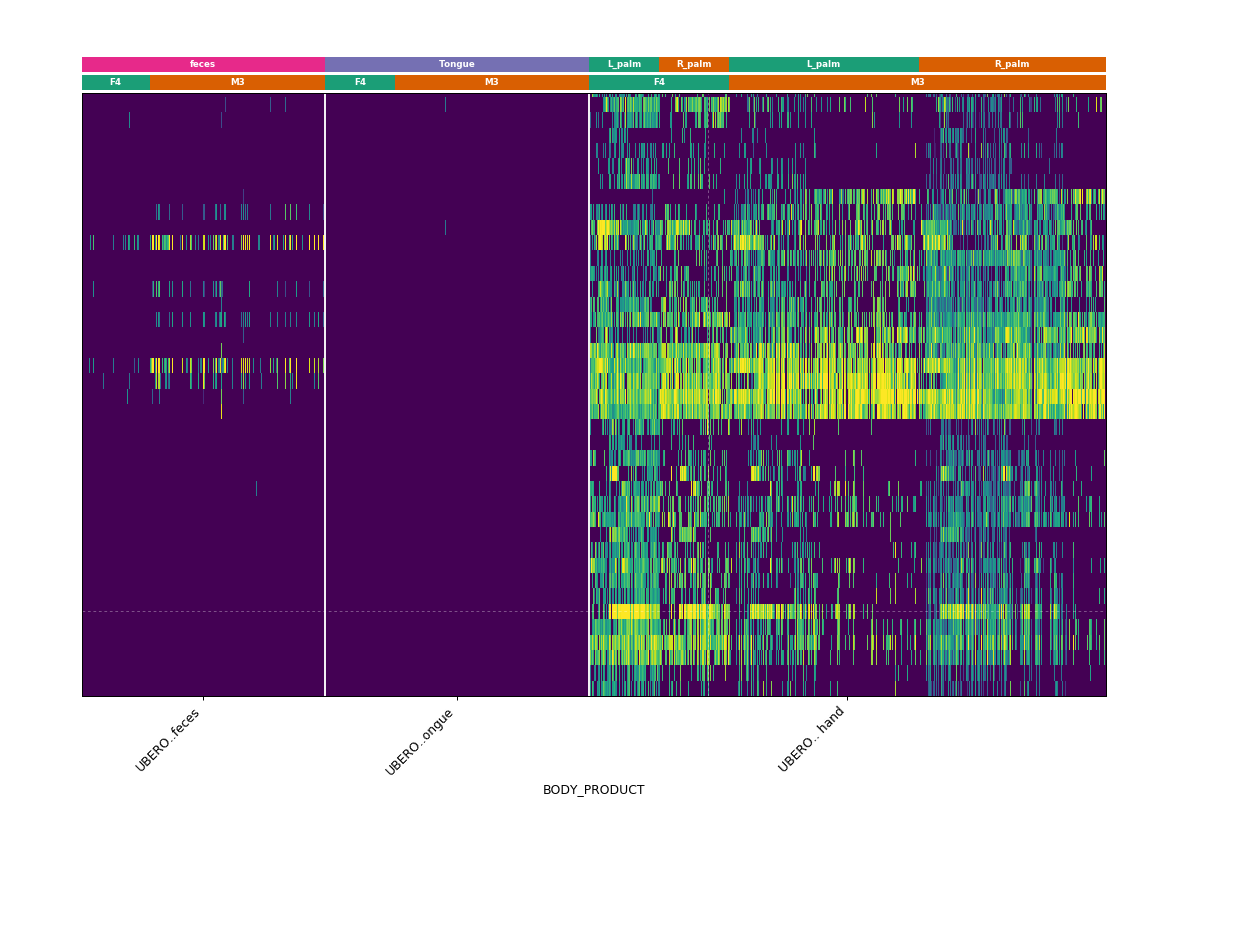

In [44]:
f=ttt.plot_sort('BODY_PRODUCT',gui='jupyter',sample_color_bars=['HOST_SUBJECT_ID','COMMON_SAMPLE_SITE'],
                rect=[-0.5, 1966.5, 2511.5, 2354.5],
                clim=[0,10], feature_field=None)

__We can see there is a set of sOTUs showing up in together in the individual of "M3" sporadically__ (near the bottom of the heatmap above). This behavior is difficult to see in a naive heatmap without clustering and sorting the features.

In [45]:
f.save_figure('figure-movpic-all-clustered-zoom-sporadic.pdf')

## find features correlated with time in the individule of "M3"

In [64]:
tt = feces.filter_samples('HOST_SUBJECT_ID','M3')
tt=tt.cluster_features(50)

2017-05-02 13:50:24 INFO 493 remaining


In [65]:
dd = tt.correlation('DAYS_SINCE_EXPERIMENT_START')

2017-05-02 13:50:26 INFO 493 remaining
2017-05-02 13:50:26 INFO method spearman for field DAYS_SINCE_EXPERIMENT_START. Positive correlated features : 60. Negative correlated features : 191. total 251


We get 259 features with significant correlation following FDR control.

Note features are sorted by the effect size (biggest/smallest correlation is top/bottom)

<IPython.core.display.Javascript object>


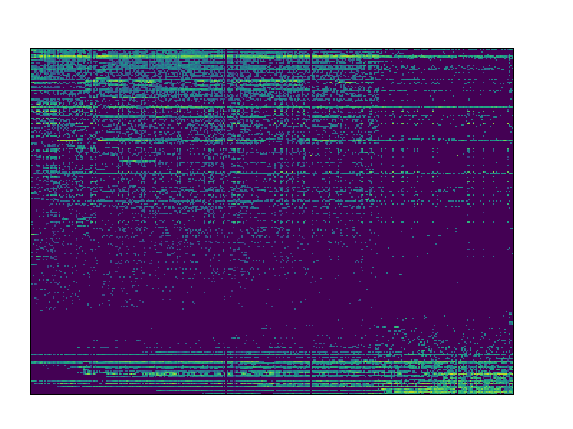

In [66]:
dd.plot(feature_field=None, gui='jupyter')

## We can also sort by the center of mass

In [67]:
ttt=tt.filter_prevalence(0.3)

2017-05-02 13:50:28 INFO 76 remaining


In [68]:
ttt=ttt.sort_centroid()

In [69]:
ttt.sample_metadata.HOST_SUBJECT_ID.value_counts()

M3    336
Name: HOST_SUBJECT_ID, dtype: int64

<IPython.core.display.Javascript object>


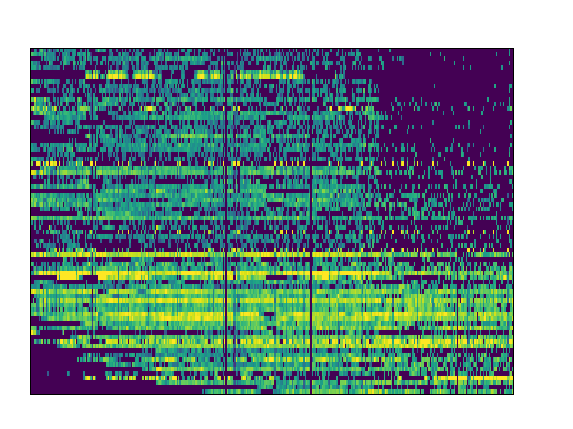

In [70]:
f=ttt.plot(gui='jupyter',feature_field=None, clim=[0,10])

## Some more analyses
We can sort the features based on abundance in a specific field/value group. For example, let's sort the features by their abundances in the individual "M3" and then look how abundant those bacteria are in the individual "F4":

In [33]:
tt = feces.sort_abundance({'HOST_SUBJECT_ID': ['M3']})

<IPython.core.display.Javascript object>


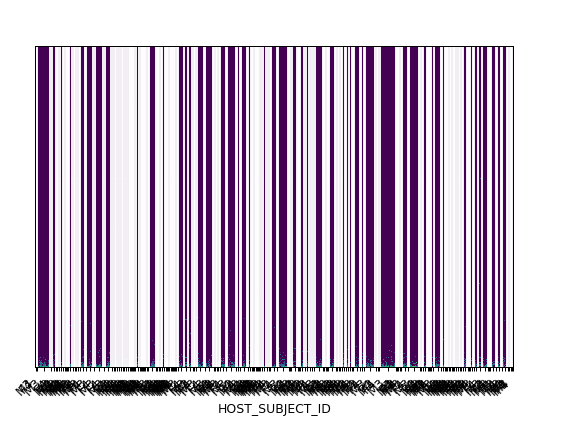

In [34]:
tt.plot(sample_field='HOST_SUBJECT_ID', feature_field=None, gui='jupyter')

## we can find the sOTUs that are different between left and right hands

2017-05-02 13:37:08 INFO 2 remaining
2017-05-02 13:37:08 INFO ignoring 2 features
2017-05-02 13:37:09 INFO 5247 remaining
2017-05-02 13:37:09 INFO 365 samples with value 1 (['L_palm'])
2017-05-02 13:37:12 INFO method meandiff. number of higher in ['L_palm'] : 3. number of higher in None : 922. total 925


<IPython.core.display.Javascript object>


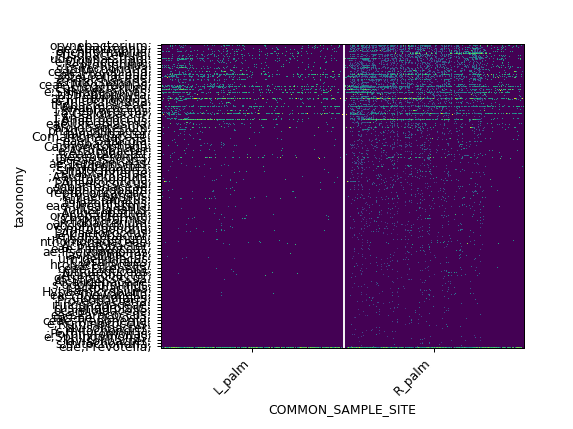

In [31]:
m3s=hand.filter_samples('HOST_SUBJECT_ID','M3')
m3s=m3s.normalize_compositional()
m3s=m3s.sort_samples('DAYS_SINCE_EPOCH')

dd=m3s.diff_abundance('COMMON_SAMPLE_SITE','L_palm')

dd.plot_sort('COMMON_SAMPLE_SITE',gui='jupyter')

2017-05-02 13:37:13 INFO 1892 remaining
2017-05-02 13:37:13 INFO 134 samples with value 1 (['L_palm'])
2017-05-02 13:37:14 INFO method meandiff. number of higher in ['L_palm'] : 195. number of higher in None : 5. total 200


<IPython.core.display.Javascript object>


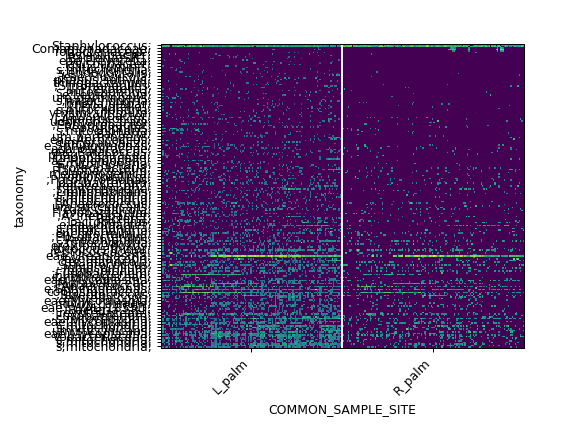

In [32]:
m3s=hand.filter_samples('HOST_SUBJECT_ID','F4')

m3s=m3s.sort_samples('DAYS_SINCE_EPOCH')

dd=m3s.diff_abundance('COMMON_SAMPLE_SITE','L_palm')

dd.plot_sort('COMMON_SAMPLE_SITE',gui='jupyter')

## Conclusions

* We can identify the taxa that colonize and persist, the ones that disappear forever in the middle of the period, and the ones that stochastically come and go, which is also reported in the original paper.
* In addition, with convenient exploration of the data in heatmap, we find a set of sOTUs appear together in a group. This set is enriched with skin bacteria. We can hypothesize that this set is likely from skin and is a result of sample collecting protocol.